<font color= blue />

# Exploratory Data Analysis

The objective of exploratory data analysis is to try and achieve the following way in understanding the data and try to get insight from it. EDA refers to the critical process in investigation on data so as to help us get the summary statistics and graphical representations.

1. Discover patterns that are there in any dataset ie selling one product helps selling another products.
2. Spot anomalies that would be detected in the datasets
3. Frame hypothesis
4. Check assumptions


### 1.1 Basic Exploration.
    - Identify null values and properties of our data
    - How to find the numerical and categorical features of our data
### 1.2 Seaborn.
### 1.3 Univariate Analysis.
        - Histogram
        - Kernel Density Estimation
        - Boxplots
### 1.4 Categorical Features in Univariate Analysis.
        - Countplots
### 1.5 Multivariate Analysis.
     - Numerical vs Numerical Features
     - Numerical vs Categorical Features
     - Categorical vs Categorical Features

## 1.1 Basic Exploration.

The are a no of function that we do in this section to undestand our data all the columns it has any missing values and outline the measure of central tendancy of our data. The following are among the main function in basic exploration.

**df.head()/tail()**:- It’s always a good idea to take a closer look at the data itself.

With the help of the head() and tail() functions of the Pandas library, we can easily check out the first few and last few lines of the DataFrame, respectively.

**df.columns** :- This help to view the no of columns and their names.

**df.shape** :- This help us view the no of rows and columns in the dataset. It comprises of no of observations and characteristcs.

**df.describe** :- Function helps us to get various summary statistics that exclude NaN values.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

**df.info** :-It is also a good practice to know the columns and their corresponding data types, along with finding whether they contain null values or not.


#### Examples 1.1 on the basic exploration section:

In [1]:
# import libraries.
import pandas as pd
import numpy as np
import matplotlib as plt


We are going to use the Standard Bank Tech Impact Challenge: Xente Credit scoring Challenge which was used in a Zindi competition.  I decided to use the training data and the following is the variables definitions :-   Variable definitions
- CustomerId: Unique number identifying the customer on platform
- TransactionStartTime: Transaction start time
- Value: Value of transaction
- Amount: Value of Transaction with charges
- TransactionId: Unique transaction identifier on platform
- BatchId: Identifier for bulk transactions being done on an account
- SubscriptionId: You can have one account with multiple subscriptions
- CurrencyCode: Country currency
- CountryCode: Numerical geographical code of country
- ProviderId: Source provider of Item bought
- ProductId: Item name being bought
- ProductCategory: Type of product
- ChannelId: Identifies if customer used Xente Paylater on any other channel
- TransactionStatus: Loan application status (1=accepted, 0 = rejected)
- IssuedDateLoan: Date loan is issued
- AmountLoan: Value of the loan issued
- Currency: Ugandan shillings Denominations
- LoanId: Loan transaction unique identifier
- PaidOnDate: Date on which the loan was paid
- IsFinalPayBack: Last payback installment
- InvestorId: Loan issuer or network owner
- DueDate: Date loan is due
- LoanApplicationId: unique identifier for loan application
- PayBackId: Loan payback number identifier
- ThirdPartyId: Transaction id for a loan payback
- IsThirdPartyConfirmed: loan order succeeded on platform
- IsDefaulted: Exceeded agreed payback time (1 = default, 0 = non-default)


In [2]:
# load a dataset.
df = pd.read_csv("Client_data.csv")

In [3]:
# view the first 5 rows and last row of the data
df.head()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
0,CustomerId_27,21-09-18 12:17,550.0,-550.0,TransactionId_1683,BatchId_641,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerId_27,25-09-18 9:20,550.0,-550.0,TransactionId_2235,BatchId_820,SubscriptionId_2,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CustomerId_27,25-09-18 10:33,550.0,-550.0,TransactionId_1053,BatchId_210,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CustomerId_27,27-09-18 10:26,1000.0,-1000.0,TransactionId_2633,BatchId_876,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CustomerId_27,27-09-18 12:44,500.0,-500.0,TransactionId_71,BatchId_1362,SubscriptionId_4,UGX,256,ProviderId_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
2095,CustomerId_28,30-03-19 21:55,2000.0,-2000.0,TransactionId_1185,BatchId_2069,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_293,29-04-19 14:35,1.0,InvestorId_1,29-04-19 21:55,LoanApplicationId_524,PayBackId_1106,ThirdPartyId_857,1.0,0.0
2096,CustomerId_28,30-03-19 23:54,5000.0,-5000.0,TransactionId_1824,BatchId_1552,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1040,29-04-19 14:32,1.0,InvestorId_1,29-04-19 23:53,LoanApplicationId_1441,PayBackId_966,ThirdPartyId_958,1.0,0.0
2097,CustomerId_34,31-03-19 5:40,5000.0,-5000.0,TransactionId_2507,BatchId_1093,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1585,15-06-19 6:20,1.0,InvestorId_1,30-04-19 5:40,LoanApplicationId_1466,PayBackId_1271,ThirdPartyId_1981,1.0,0.0
2098,CustomerId_346,31-03-19 9:37,1500.0,-1500.0,TransactionId_540,BatchId_1239,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1314,23-04-19 15:44,1.0,InvestorId_1,30-04-19 9:37,LoanApplicationId_1389,PayBackId_945,ThirdPartyId_705,1.0,0.0
2099,CustomerId_188,31-03-19 12:16,1000.0,-1000.0,TransactionId_1889,BatchId_355,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1570,10-04-19 17:33,1.0,InvestorId_1,30-04-19 12:16,LoanApplicationId_57,PayBackId_830,ThirdPartyId_899,1.0,0.0


In [5]:
# The columns and their names.
df.columns

Index(['CustomerId', 'TransactionStartTime', 'Value', 'Amount',
       'TransactionId', 'BatchId', 'SubscriptionId', 'CurrencyCode',
       'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStatus', 'IssuedDateLoan', 'AmountLoan',
       'Currency', 'LoanId', 'PaidOnDate', 'IsFinalPayBack', 'InvestorId',
       'DueDate', 'LoanApplicationId', 'PayBackId', 'ThirdPartyId',
       'IsThirdPartyConfirmed', 'IsDefaulted'],
      dtype='object')

In [6]:
# The no of columns and rows in the data
df.shape

(2100, 27)

In [7]:
# Different columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 27 columns):
CustomerId               2100 non-null object
TransactionStartTime     2100 non-null object
Value                    2100 non-null float64
Amount                   2100 non-null float64
TransactionId            2100 non-null object
BatchId                  2100 non-null object
SubscriptionId           2100 non-null object
CurrencyCode             2100 non-null object
CountryCode              2100 non-null int64
ProviderId               2100 non-null object
ProductId                2100 non-null object
ProductCategory          2100 non-null object
ChannelId                2100 non-null object
TransactionStatus        2100 non-null int64
IssuedDateLoan           1488 non-null object
AmountLoan               1488 non-null float64
Currency                 1488 non-null object
LoanId                   1488 non-null object
PaidOnDate               1488 non-null object
IsFinalPayBack    

In [8]:
# This gives the descriptive statistics for the data 
df.describe()

,Value,Amount,CountryCode,TransactionStatus,AmountLoan,IsFinalPayBack,IsThirdPartyConfirmed,IsDefaulted
count,2.100000e+03,2.100000e+03,2100.0,2100.000000,1.488000e+03,1488.000000,1488.000000,1488.000000
mean,5.302947e+04,-5.291354e+04,256.0,0.708571,1.182725e+04,0.731855,0.982527,0.119624
std,1.539498e+05,1.539653e+05,0.0,0.454529,7.666506e+04,0.443143,0.131070,0.324630
min,1.000000e+02,-2.500000e+06,256.0,0.000000,5.000000e+01,0.000000,0.000000,0.000000
25%,1.000000e+03,-1.200000e+04,256.0,0.000000,1.113750e+03,0.000000,1.000000,0.000000
50%,3.500000e+03,-3.500000e+03,256.0,1.000000,2.800000e+03,1.000000,1.000000,0.000000
75%,1.200000e+04,-1.000000e+03,256.0,1.000000,1.050000e+04,1.000000,1.000000,0.000000
max,2.500000e+06,-1.000000e+02,256.0,1.000000,2.760000e+06,1.000000,1.000000,1.000000


####  Indentify the no of categorical features in our dataset.: 
In our client data we can  let's find out the number of Categorical Features in our dataset.

In [9]:
cat_features_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
cat_features_columns

['ProductId',
 'ThirdPartyId',
 'Currency',
 'ProviderId',
 'TransactionId',
 'CustomerId',
 'BatchId',
 'SubscriptionId',
 'IssuedDateLoan',
 'PayBackId',
 'ChannelId',
 'DueDate',
 'CurrencyCode',
 'TransactionStartTime',
 'ProductCategory',
 'LoanApplicationId',
 'PaidOnDate',
 'LoanId',
 'InvestorId']

In [45]:
df['SubscriptionId'].head()

0    SubscriptionId_2
1    SubscriptionId_2
2    SubscriptionId_4
3    SubscriptionId_4
4    SubscriptionId_4
Name: SubscriptionId, dtype: object

### 1.2 Seaborn

This is a library in the python library in matplotlib that help us visualise data by outlining the correlation of data which helps in providing univariate and multivariate analysis. In this we use a heatmap to achieve this. Its important to remove correlated variables to improve our model.

It provides a high-level interface for drawing attractive statistical graphics.

Some of the features that seaborn offers are : 

* Several built-in themes for styling matplotlib graphics
* Tools for choosing color palettes to make beautiful plots that reveal patterns in your data
* Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data

They are a no of factors that seaborn achieves on the data visualisation:

- Tools that fit and visualize models for different kinds of independent and dependent variables
- Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices
- A function to plot statistical time series data with flexible estimation and representation of uncertainty around the estimate
- High-level abstractions for structuring grids of plots that let you easily build complex visualizations


In [10]:
# import that library
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# drop columns which are coded so that they do not interefere with our analysis.
df= df.drop(['CountryCode','TransactionStatus'], axis = 1)

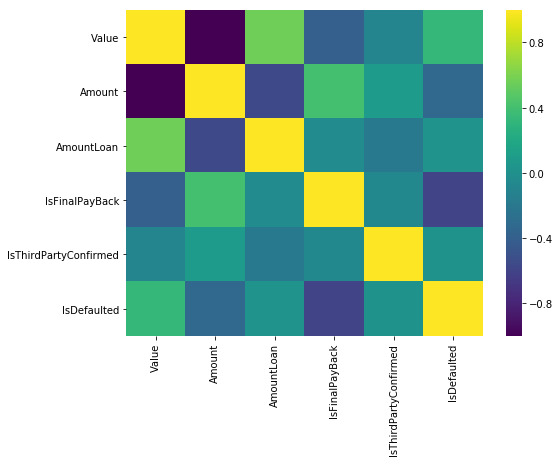

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='viridis');

We can see the following inferences from above: 
- A lot of variables are correlated to amount of loan and value.

- The is finally pay back and amount is also positive correlated

**Its advisable to remove such correlated variables during feature selection.**

C:\Users\admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


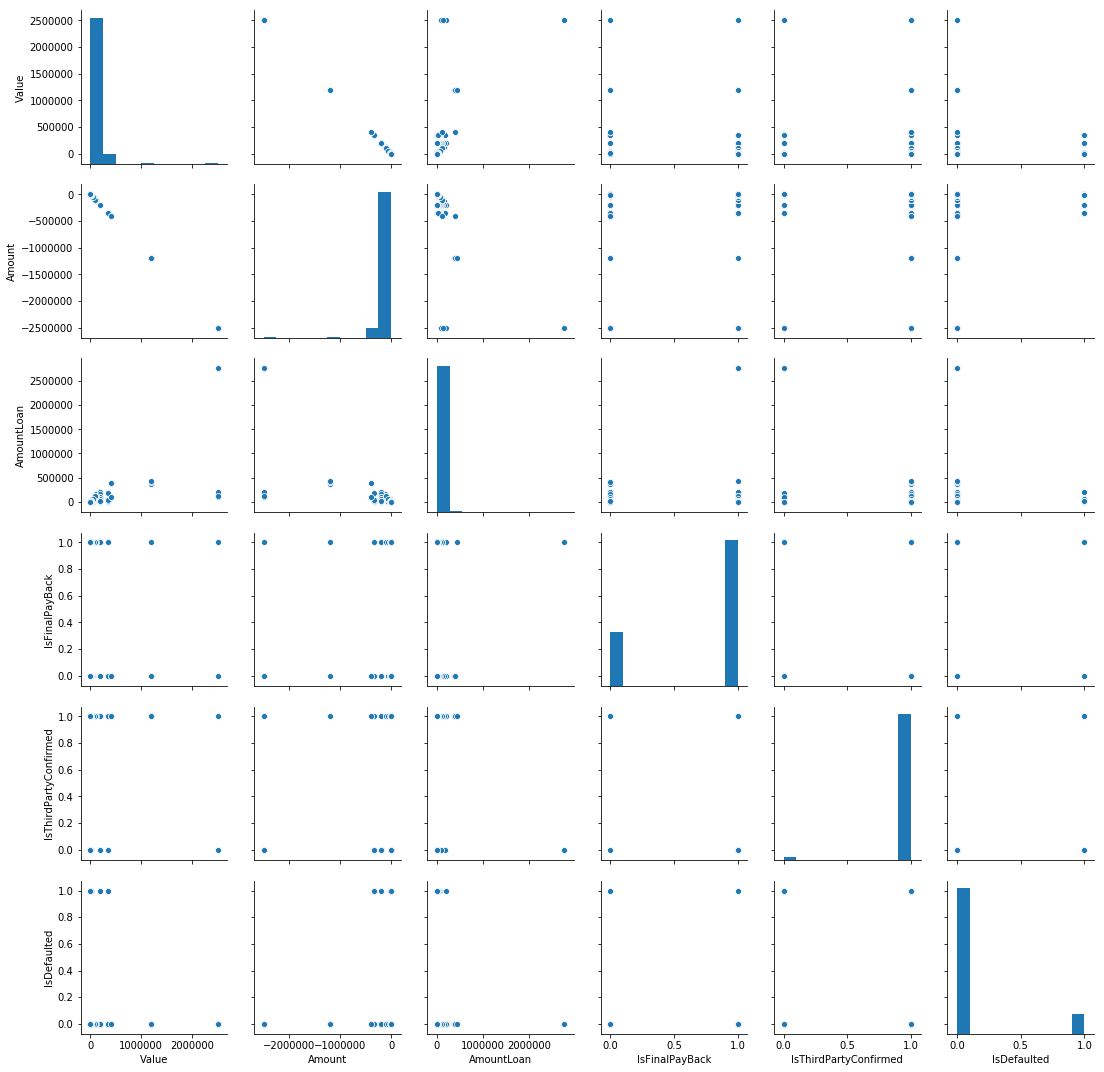

In [13]:
# Visualizing relations between all major variables
cols = ['Value', 'Amount', 'AmountLoan', 'IsFinalPayBack', 'IsThirdPartyConfirmed', 'IsDefaulted']
sns.pairplot(df[cols]);

### 1.3 Univariate Analysis

**What is Univariate Analysis?**

Univariate analysis is the simplest form of analyzing data.

“Uni” means “one”, so in other words your data has only one variable.

It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

Univariate Analysis can be done either on Numerical or Categorical features.

#### 1.3.1 Histogram.

A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the no of observatiosn that fall in each bin.

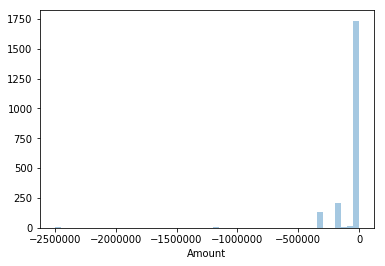

In [14]:
x = df['Amount'].dropna()
sns.distplot(x, kde=False);

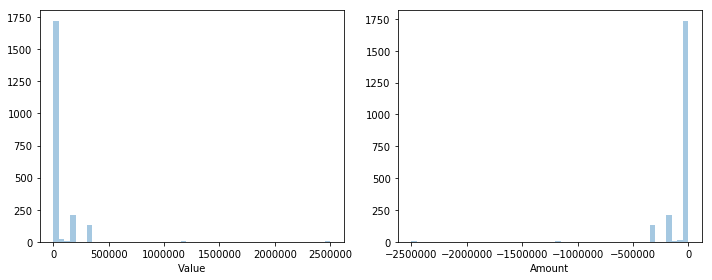

In [15]:
# Histograms on a no of columns
num_cols = ['Value', 'Amount']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(df[num_cols[i]], kde=False)
        plt.subplot(122)            
        sns.distplot(df[num_cols[i+1]], kde=False)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(df[num_cols[i]], kde=False)

### The Kernel Density Estimation.

The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution.

Like the histogram, the KDE plot encodes the density of observations on one axis with height along the other axis:

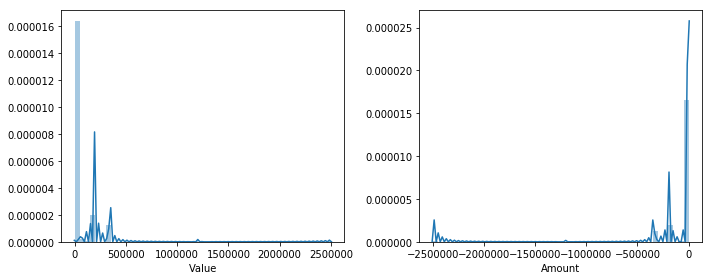

In [16]:
# Histograms

num_cols = ['Value', 'Amount']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(df[num_cols[i]], hist=True, kde=True)
        plt.subplot(122)            
        sns.distplot(df[num_cols[i+1]], hist=True, kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(df[num_cols[i]], hist=True, kde=True)

We can observe that all of the histograms are left or right skewed, hence a transformation is required to make them linear.

### Boxplots

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.

The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

Using this we can find the features which can be removed.
The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary:

- Minimum
- First quartile
- Median
- Third quartile
- Maximum.
In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR).

A segment inside the rectangle shows the median and "whiskers" above and below the box show the locations of the minimum and maximum.

**Outliers** are either 3×IQR or more above the third quartile or 3×IQR or more below the first quartile.

**Suspected outliers** are are slightly more central versions of outliers: either 1.5×IQR or more above the third quartile or 1.5×IQR or more below the first quartile.

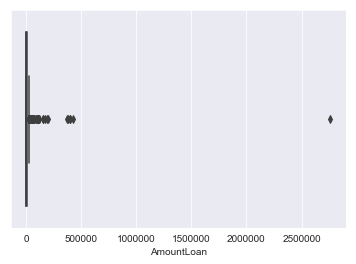

In [17]:
import seaborn as sns
sns.set_style("darkgrid")
sns.boxplot(x=df["AmountLoan"]);

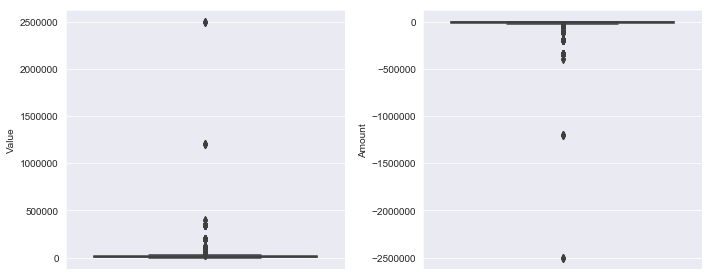

In [18]:
# BoxPlots

num_cols = ['Value', 'Amount']
facet = None
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(facet, num_cols[i],data = df)
        plt.subplot(122)            
        sns.boxplot(facet, num_cols[i+1],data = df)
        plt.tight_layout()
        plt.show()

    else:
        sns.boxplot(facet, num_cols[i],data = df)

### 1.4 Categorical Features in Univariate Variables

### 1.4.1 Countplots.

We need to check the distribution of the categorical columns.

We can use Countplots for this which does nothing but shows the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. 

We chose the following columns from the above categorical_features_columns :
* ProductID
* ProductCategory
* CustomerId


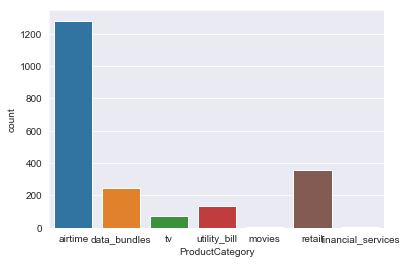

In [19]:
sns.countplot('ProductCategory', data=df);

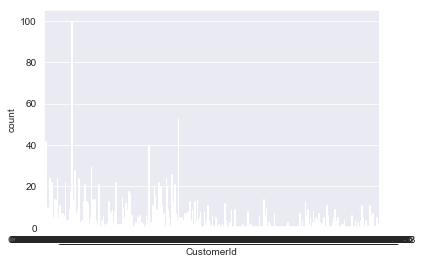

In [20]:
sns.countplot('CustomerId', data=df)

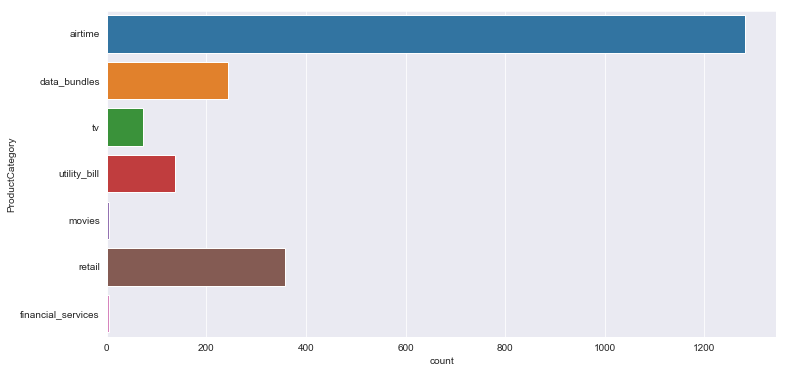

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(y='ProductCategory', data=df);

### 1.5 Multivariate Analysis

What if two or more variables are related? This would surely help derive further insight on the client data on loan amount.

In Multivariate analysis we try to find the relations between multiple variables. Obviously, in real life problems variables can be any combination of numeric or categorical variables. The combinations are:

- Numeric vs Numeric
- Numeric vs Categorical
- Categorical vs Categorical

Another aspect of variable combination we look at is:

- Feature vs Feature
- Feature vs Target

#### 1.5.1 Numeric vs Numeric

For these kind of plots we use a scatterplot of the two variables. Although one can use a variety of plots in seaborn to do a quick and dirty EDA to some sophisticated plots. lmplot is one of the plots to do a scatterplot in seaborn, it'll by default fit a regression line on top which you can control using 'fit_reg' argument.

Now we will plot some important feature against our target.

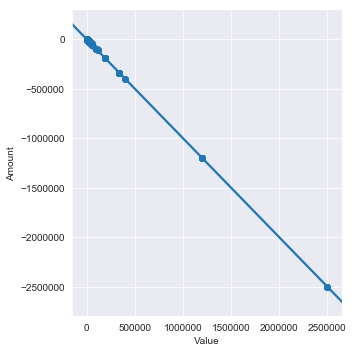

In [22]:
sns.lmplot('Value', 'Amount', data=df, fit_reg=True);

Another plot that we can use is a jointplot which gives a plethora of information in a single plot. It has:

- Scatter Plot
- Regression line fit to the data.
- Histogram and kde of individual variables.
- Pearson correlation and p value.

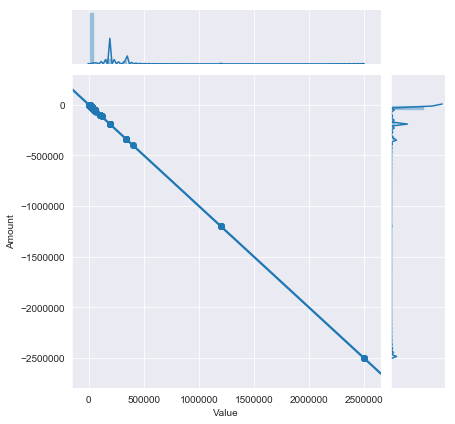

In [23]:
sns.jointplot('Value', 'Amount', data=df, kind='reg');

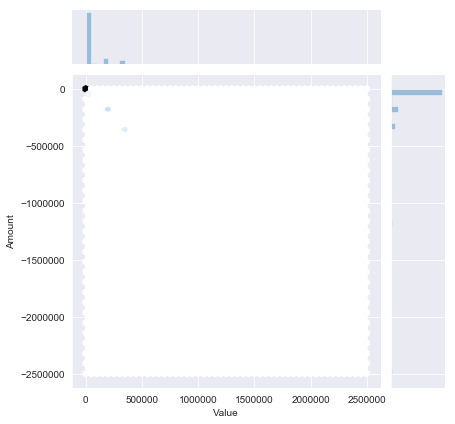

In [24]:
sns.jointplot('Value', 'Amount', data=df, kind='hex');

Since we are going to use linear regression for modelling, its necessary to remove correlated variables to improve our model. We must find correlations using pandas 'corr' function and can visualize the correlation matrix using a heatmap in seaborn.

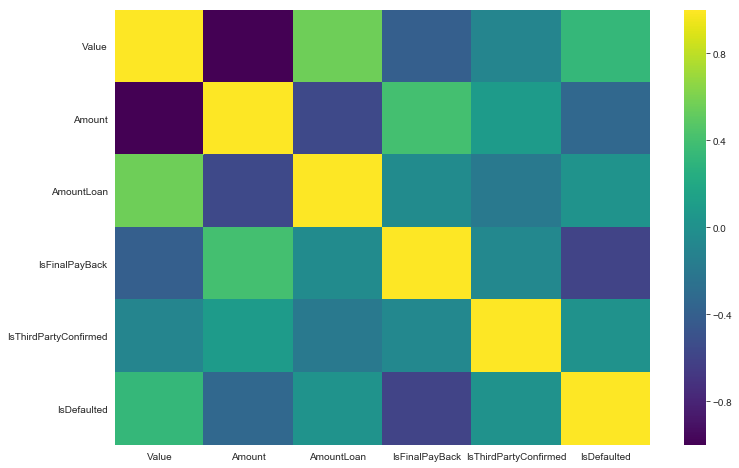

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis');

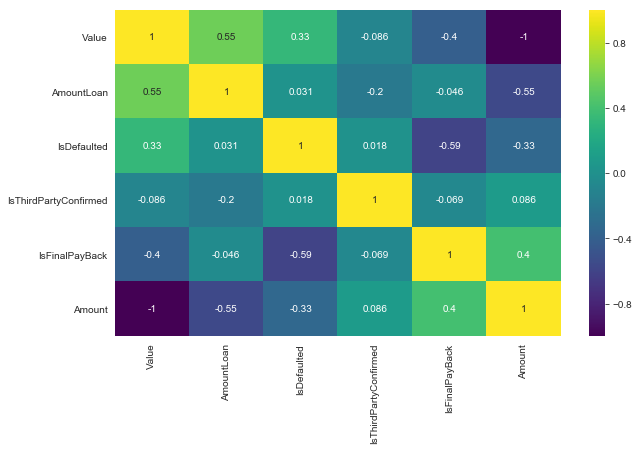

In [26]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Value')['Value'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis');

- Amount Loan are strongly correlated with value.

#### 1.5.2 Numeric vs Categorical

For us to plot the numerical and categorical data we use the following plots - boxplots and swarmplots. We can create this plots using fucntion seaborn library. We create a boxplots for numerical variables grouped by categories in categorical variables.

##### Box plots

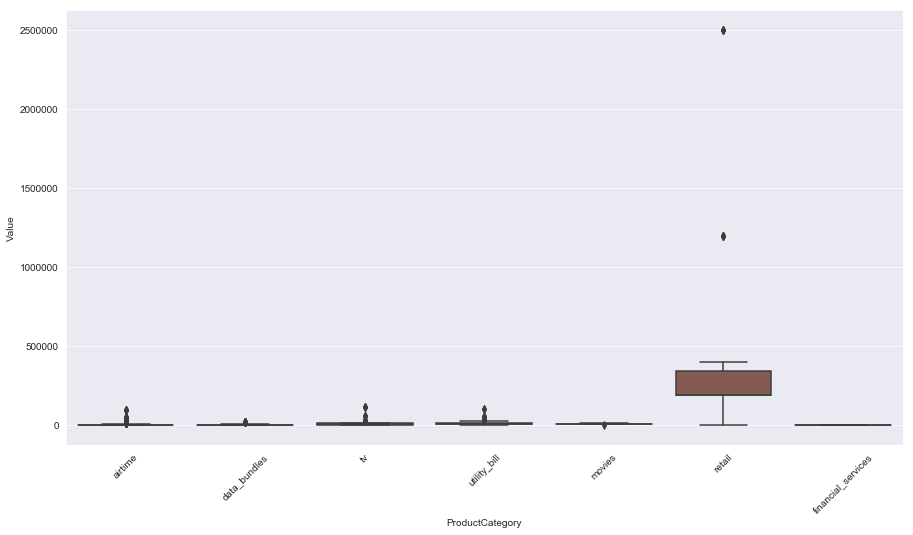

In [35]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('ProductCategory', 'Value', data=df)

The amount stagnated as the value increased only in the retail where there was there is an increase in the value.

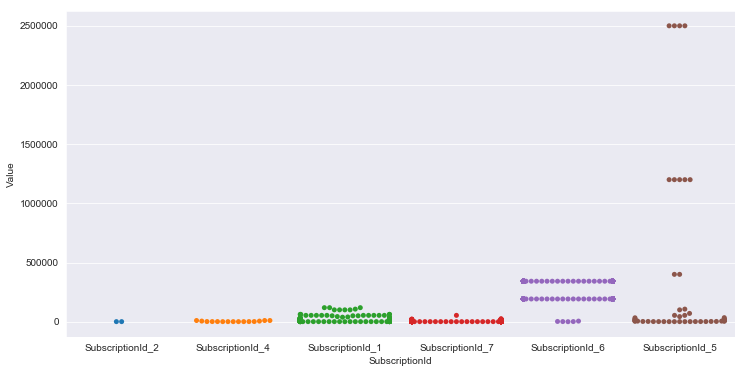

In [48]:
plt.figure(figsize=(12,6))
sns.swarmplot('SubscriptionId', 'Value', data=df);

### 1.6 Categorical vs Categorical

This can be done using using crosstab or graphically using a stacked barplot. We consider two variables ProductCategory and  SubscriptionId  check the relation between them using both of these.

In [47]:
crosstab = pd.crosstab(index=df["ProductCategory"], columns=df["SubscriptionId"]).head()
crosstab

SubscriptionId,SubscriptionId_1,SubscriptionId_2,SubscriptionId_4,SubscriptionId_5,SubscriptionId_6,SubscriptionId_7
ProductCategory,,,,,,
airtime,83,2,15,23,2,1156
data_bundles,34,0,0,0,2,208
financial_services,1,0,0,3,0,0
movies,4,0,0,0,0,1
retail,4,0,0,13,341,0


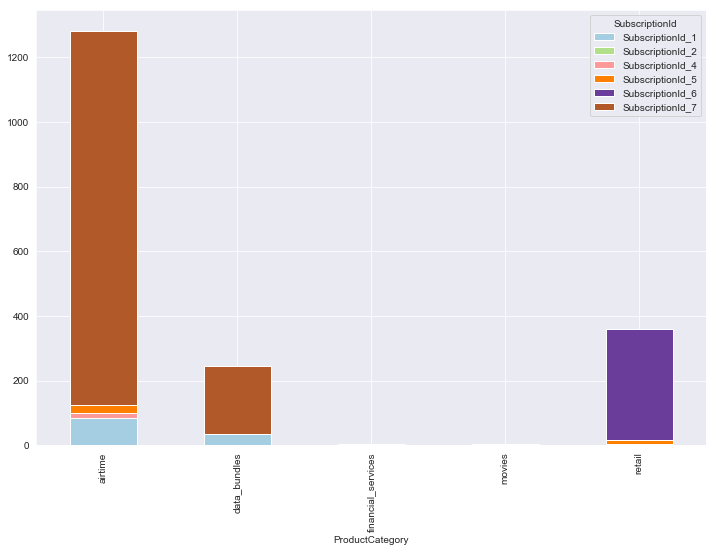

In [49]:
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired');

- Based on the the subscription 7 most of them were requesting for the loan airtime and data bundles.
- Subscription 6 most of the loan were for retail category.